[1] "For the first prior with a mean value = 20"
[1] "the numerical mean is " "25.6857117243477"      
[1] "the numerical variance is " "16.5981685418589"          
[1] "The interval between "            "17.6857117243477"                
[3] " and "                            "33.6857117243477"                
[5] " is the 95% Credibility interval"
[1] "For the second prior with a mean value = 30"
[1] "the numerical mean is " "26.1004602601044"      
[1] "the numerical variance is " "15.9925662000583"          
[1] "The interval between "            "18.3004602601044"                
[3] " and "                            "33.9004602601044"                
[5] " is the 95% Credibility interval"
[1] "Even a shift of the prior mean of 50% lead to a shift of the credibility interval of about 4% using only 15 points, further proof that the choice of prior becomes irrelevant with a large amout of points"


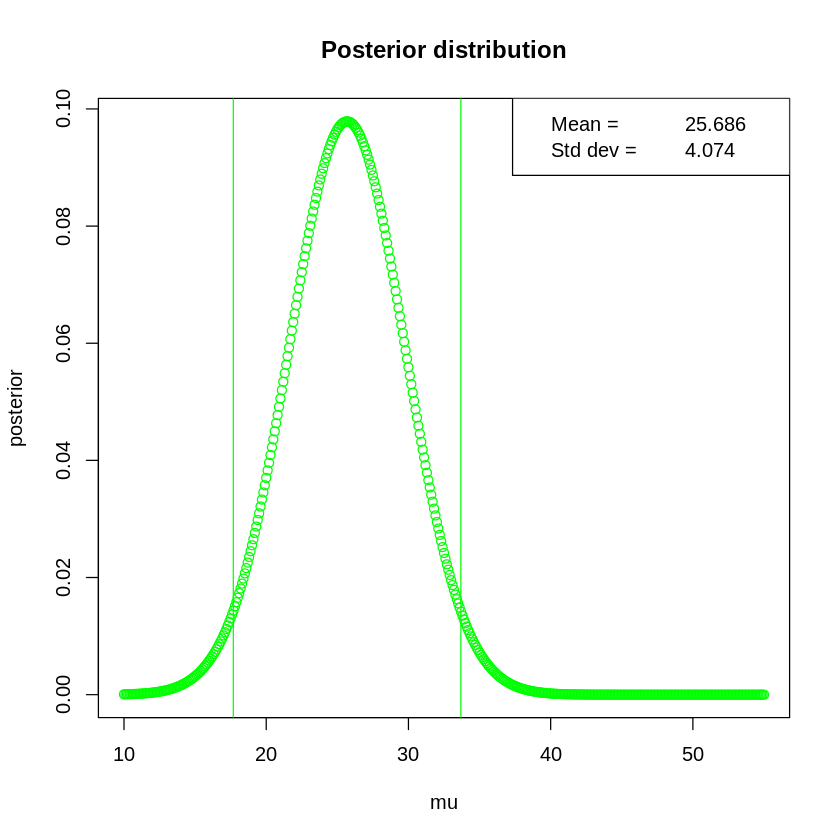

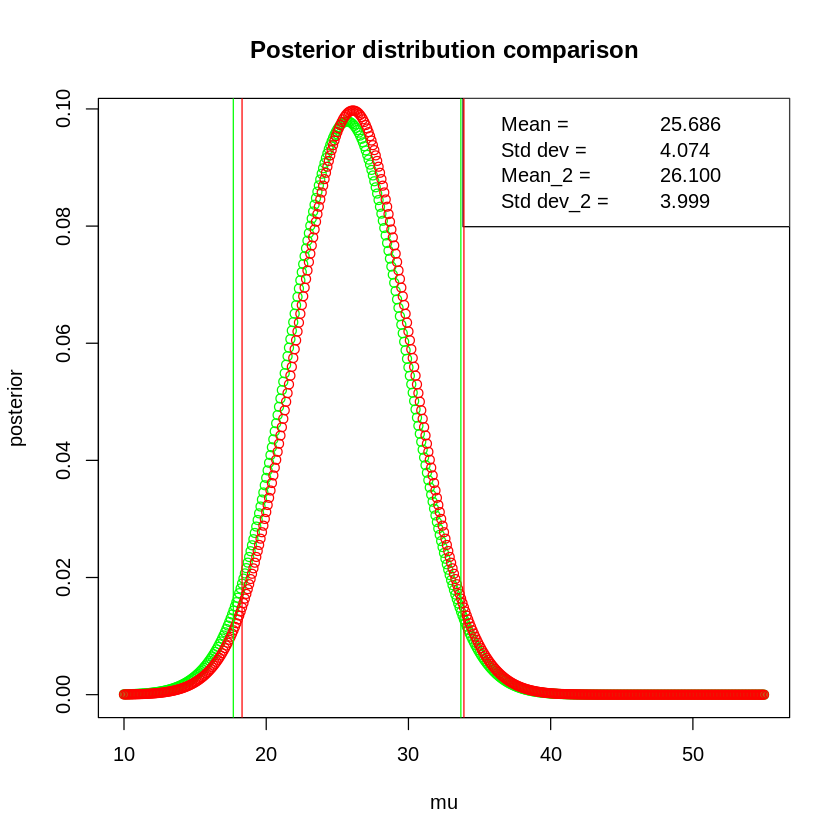

In [28]:
#Ex 1

mu_p <- 20
mu_p_2 <- 30
var_p <- 25
var_p_2 <- 16
point_spacing <- 0.1
mu <- seq(10,55,point_spacing)
var <- 16


data <- c (26.8,26.3,28.3,28.5,16.3,31.9,28.5,27.2,20.9,27.5,28,18.6,22.3,25.0,31.5)

like <- function (data,mu){
    counter <- 1
    if(length(data)> 1) counter <- like(data[2:length(data)],mu)
    return (counter*dnorm(data[1],mu,var))
    }
L <- like(data,mu)

norm <- sum(dnorm(mu,mu_p,var_p)*L*point_spacing)

posterior <- (dnorm(mu,mu_p,var_p)*L/norm)

mean <-  sum(mu*dnorm(mu,mu_p,var_p)*L*point_spacing/norm)
variance <- sum(mu*mu*dnorm(mu,mu_p,var_p)*L*point_spacing/norm) -sum((mu*dnorm(mu,mu_p,var_p)*L*point_spacing/norm))^2
print("For the first prior with a mean value = 20")
print(c("the numerical mean is ",mean))
print(c("the numerical variance is ",variance))


sigma_try <- seq(point_spacing,30,point_spacing)
sigma <- 0

for (i in sigma_try) {
    integration_interval <- seq(mean - i,mean + i,point_spacing)
    if (sum(dnorm(integration_interval,mu_p,var_p)*like(data,integration_interval)*point_spacing/norm) > 0.95) {sigma <- i
                                                                                                 break}
    }
print(c("The interval between " , mean - sigma, " and " ,mean + sigma," is the 95% Credibility interval" ))
      
plot(mu,posterior,main="Posterior distribution",col="green")
legend(x="topright",y="topright",ncol=2L,legend=c("Mean =","Std dev = ",format(round(mean, 3), nsmall = 3),format(round(sqrt(variance), 3), nsmall = 3)))
abline(v=mean - sigma,col="green")
abline(v=mean + sigma,col="green")      





norm_2 <- sum(dnorm(mu,mu_p_2,var_p_2)*L*point_spacing)

posterior_2 <- (dnorm(mu,mu_p_2,var_p_2)*L/norm_2)

mean_2 <-  sum(mu*dnorm(mu,mu_p_2,var_p_2)*L*point_spacing/norm_2)
variance_2 <- sum(mu*mu*dnorm(mu,mu_p_2,var_p_2)*L*point_spacing/norm_2) -sum((mu*dnorm(mu,mu_p_2,var_p_2)*L*point_spacing/norm_2))^2
print("For the second prior with a mean value = 30")
print(c("the numerical mean is ",mean_2))
print(c("the numerical variance is ",variance_2))

sigma_2 <- 0

for (i in sigma_try) {
    integration_interval <- seq(mean_2 - i,mean_2 + i,point_spacing)
    if (sum(dnorm(integration_interval,mu_p_2,var_p_2)*like(data,integration_interval)*point_spacing/norm_2) > 0.95) {sigma_2 <- i
                                                                                                 break}
    }
print(c("The interval between " , mean_2 - sigma_2, " and " ,mean_2 + sigma_2," is the 95% Credibility interval" ))
print("Even a shift of the prior mean of 50% lead to a shift of the credibility interval of about 4% using only 15 points, further proof that the choice of prior becomes irrelevant with a large amout of points")

plot(mu,posterior,main="Posterior distribution comparison",col="green")
points(mu,posterior_2,main="Posterior distribution",col="red")
legend(x="topright",y="topright",ncol=2L,legend=c("Mean =","Std dev = ","Mean_2 =","Std dev_2 = ",format(round(mean, 3), nsmall = 3),format(round(sqrt(variance), 3), nsmall = 3),format(round(mean_2, 3), nsmall = 3),format(round(sqrt(variance_2), 3), nsmall = 3)))
abline(v=mean - sigma,col="green")
abline(v=mean + sigma,col="green") 
abline(v=mean_2 - sigma_2,col="red")
abline(v=mean_2 + sigma_2,col="red") 


[1] "the numerical mean is " "4.61781992029178"      
[1] "the numerical variance is " "0.807453916420531"         
[1] "The interval between "            "2.86781992029178"                
[3] " and "                            "6.36781992029178"                
[5] " is the 95% Credibility interval"


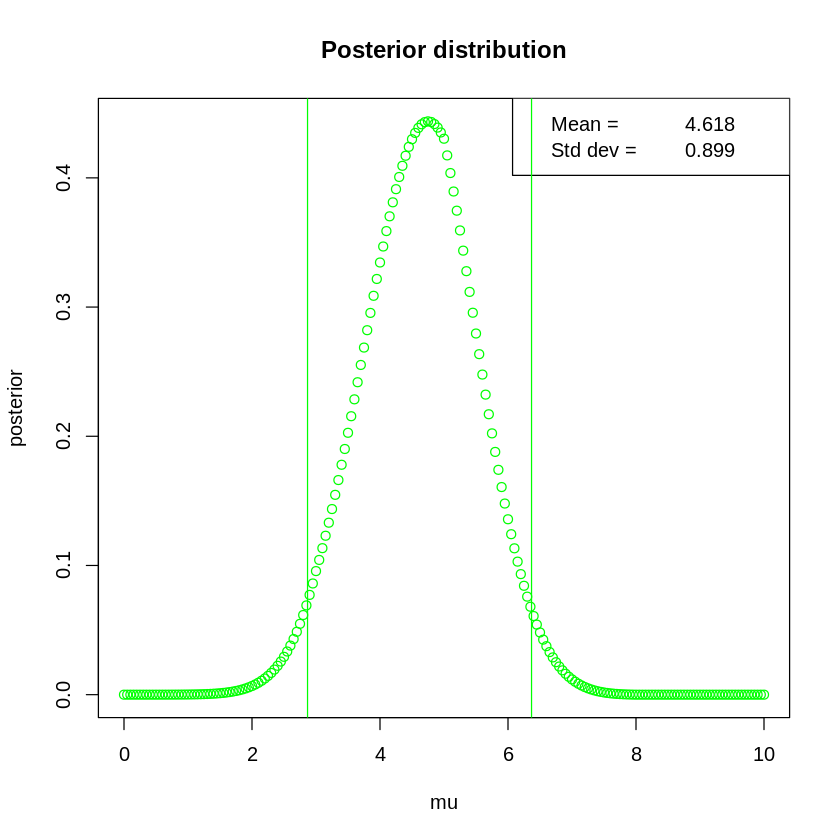

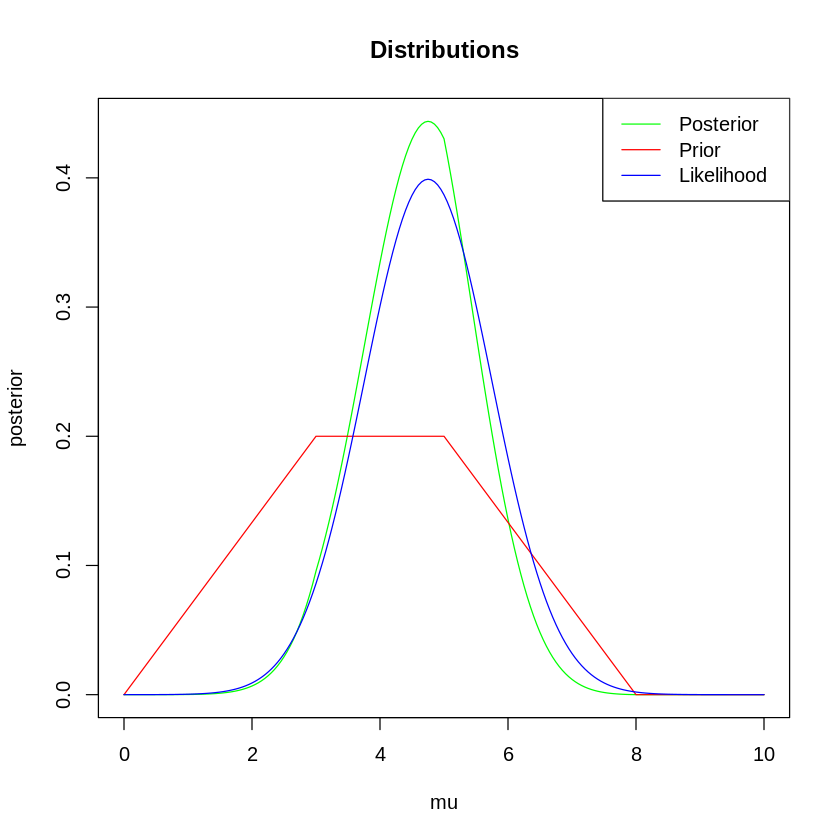

In [34]:
#Ex 2

point_spacing <- 0.05
mu <- seq(0,10,point_spacing)
var <- 4


data <- c(4.09,4.68,1.87,2.62,5.58,8.68,4.07,4.78,4.79,4.49,5.85,5.09,2.40,6.27,6.30,4.47)

prior <- function(x){
    x <- ifelse(x> 3 & x<= 5,3,x)
    x <- ifelse(x> 5 & x<= 8,8 - x,x)
    x <- ifelse(x> 8 ,0,x)
    return (x)
}

like <- function (data,mu){
    counter <- 1
    if(length(data)> 1) counter <- like(data[2:length(data)],mu)
    return (counter*dnorm(data[1],mu,var))
    }
L <- like(data,mu)

norm <- sum(prior(mu)*L*point_spacing)
norm_L <- sum(L*point_spacing)

posterior <- (prior(mu)*L/norm)

mean <-  sum(mu*prior(mu)*L*point_spacing/norm)
variance <- sum(mu*mu*prior(mu)*L*point_spacing/norm) -sum((mu*prior(mu)*L*point_spacing/norm))^2
print(c("the numerical mean is ",mean))
print(c("the numerical variance is ",variance))

sigma_try <- seq(point_spacing,30,point_spacing)
sigma <- 0

for (i in sigma_try) {
    integration_interval <- seq(mean - i,mean + i,point_spacing)
    if (sum(prior(integration_interval)*like(data,integration_interval)*point_spacing/norm) > 0.95) {sigma <- i
                                                                                                 break}
    }
print(c("The interval between " , mean - sigma, " and " ,mean + sigma," is the 95% Credibility interval" ))
      
plot(mu,posterior,main="Posterior distribution",col="green")
legend(x="topright",y="topright",ncol=2L,legend=c("Mean =","Std dev = ",format(round(mean, 3), nsmall = 3),format(round(sqrt(variance), 3), nsmall = 3)))
abline(v=mean - sigma,col="green")
abline(v=mean + sigma,col="green")      


plot(mu,posterior,main="Distributions",col="green",type = "l")
lines(mu,prior(mu)/15,col="red")
lines(mu,L/norm_L,col="blue")
legend(x="topright",y="topright",legend=c("Posterior","Prior","Likelihood"),col=c("green","red","blue"),lty=c(1,1,1))


In [44]:
#Ex 3

point_spacing <- 0.0001
p <- seq(0,1,point_spacing)

n_tot <- 116
n_tot_2 <- 165
n_high <- 11
n_high_2 <- 9
p_test <- 0.1

p_freq <- 1.0*n_high/n_tot
sig_freq <- sqrt(p_freq*(1-p_freq)/n_tot)

p_freq_2 <- 1.0*n_high_2/n_tot_2
sig_freq_2 <- sqrt(p_freq_2*(1-p_freq_2)/n_tot_2)

prior<-dbeta(p,1,10)

L <- dbinom(n_high,n_tot,p)

norm <- sum(prior*L*point_spacing)

posterior <- (prior*L/norm)

mean <-  sum(p*prior*L*point_spacing/norm)
variance <- sum(p*p*prior*L*point_spacing/norm) -sum((p*prior*L*point_spacing/norm))^2
print(c("the numerical mean is ",mean))
print(c("the numerical variance is ",variance))


sigma_try <- seq(point_spacing,1,point_spacing)
sigma <- 0

for (i in sigma_try) {
    integration_interval <- seq(mean - i,mean + i,point_spacing)
    if (sum(dbeta(integration_interval,1,10)*dbinom(n_high,n_tot,integration_interval)*point_spacing/norm) > 0.95) {sigma <- i
                                                                                                 break}
    }
print(c("The interval between " , mean - sigma, " and " ,mean + sigma," is the 95% Credibility interval" ))
print("The test probability lies in the credibility interval at 95 % so we can't reject H0 at a 5% level of significance") 

print(c("The frequentist probability is :", p_freq,"and the standard deviation is :",sig_freq))
p_H0_freq <- dbinom(n_high,n_tot,p_test)
print(c("From a frequentist point of view the probability that the observed number of positives happened via chance while the true value of the probability is 0.1 is : ",p_H0_freq, "so H0 is not rejectable at the 5% level of confidence"))


prior_2<-posterior

L_2 <- dbinom(n_high_2,n_tot_2,p)

norm_2 <- sum(prior*L_2*point_spacing)
norm_3 <- sum(prior_2*L_2*point_spacing)
norm_4 <- sum(dbeta(p,1+n_high,1+n_tot-n_high)*dbinom(n_high_2,n_tot_2,p))*point_spacing

posterior_2 <- (prior*L_2/norm_2)
posterior_3 <- (prior_2*L_2/norm_3)

mean_2 <-  sum(p*prior*L_2*point_spacing/norm_2)
mean_3 <-  sum(p*prior_2*L_2*point_spacing/norm_3)
variance_2 <- sum(p*p*prior*L_2*point_spacing/norm_2) -sum((p*prior*L_2*point_spacing/norm_2))^2
variance_3 <- sum(p*p*prior_2*L_2*point_spacing/norm_3) -sum((p*prior_2*L_2*point_spacing/norm_3))^2
print(c("the numerical mean with the second set of data and the beta prior is ",mean_2))
print(c("the numerical variance with the second set of data and the beta prior is ",variance_2))
print(c("the numerical mean with the second set of data and using the previous posterior as prior is ",mean_3))
print(c("the numerical variance with the second set of data and using the previous posterior as prior is ",variance_3))

sigma_try <- seq(point_spacing,1,point_spacing)
sigma_2 <- 0

for (i in sigma_try) {
    integration_interval <- seq(mean_2 - i,mean_2 + i,point_spacing)
    if (sum(dbeta(integration_interval,1,10)*dbinom(n_high_2,n_tot_2,integration_interval)*point_spacing/norm_2) > 0.95) {sigma_2 <- i
                                                                                                 break}
    }
print(c("The interval between " , mean_2 - sigma_2, " and " ,mean_2 + sigma_2," is the 95% Credibility interval using a beta prior" ))
print("The test probability does not lie in the credibility interval at 95 % so we can reject H0 at a 5% level of significance") 

sigma_3 <- 0

for (i in sigma_try) {
    integration_interval <- seq(mean_3 - i,mean_3 + i,point_spacing)
    if (sum(dbeta(integration_interval,1+n_high,1+n_tot-n_high)*dbinom(n_high_2,n_tot_2,integration_interval)*point_spacing/norm_4) > 0.95) {sigma_3 <- i
                                                                                                 break}
    }
print(c("The interval between " , mean_3 - sigma_3, " and " ,mean_3+ sigma_3," is the 95% Credibility interval using the previous posterior as prior" ))
print("The test probability lies in the credibility interval at 95 % so we can't reject H0 at a 5% level of significance") 


print(c("The frequentist probability on the second set of data is :", p_freq_2,"and the standard deviation is :",sig_freq_2))
p_H0_freq <- dbinom(n_high_2,n_tot_2,p_test)
print(c("From a frequentist point of view the probability that the observed number of positives happened via chance while the true value of the probability is 0.1 is : ",p_H0_freq, "so H0 is rejectable at the 5% level of confidence"))




[1] "the numerical mean is " "0.094488188976378"     
[1] "the numerical variance is " "0.000668438836877675"      
[1] "The interval between "            "0.0446881889763779"              
[3] " and "                            "0.144288188976378"               
[5] " is the 95% Credibility interval"
[1] "The test probability lies in the credibility interval at 95 % so we can't reject H0 at a 5% level of significance"
[1] "The frequentist probability is :" "0.0948275862068965"              
[3] "and the standard deviation is :"  "0.0272021986784205"              
[1] "From a frequentist point of view the probability that the observed number of positives happened via chance while the true value of the probability is 0.1 is : "
[2] "0.123287907185443"                                                                                                                                              
[3] "so H0 is not rejectable at the 5% level of confidence"                                      